In [90]:
import pandas as pd

churn = pd.read_csv(f"cleaned_churn_data.csv")
churn.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


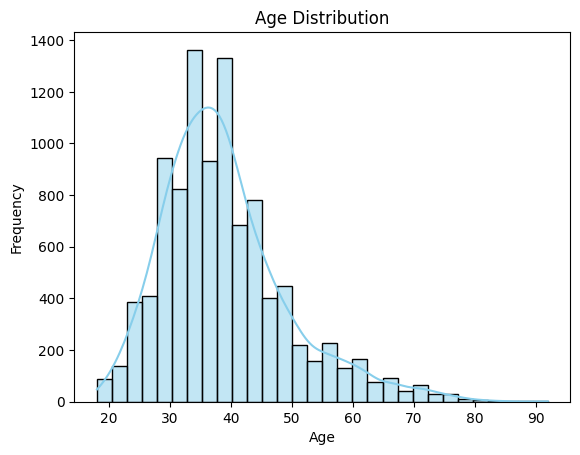

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

churn['Age'].describe()
sns.histplot(churn['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


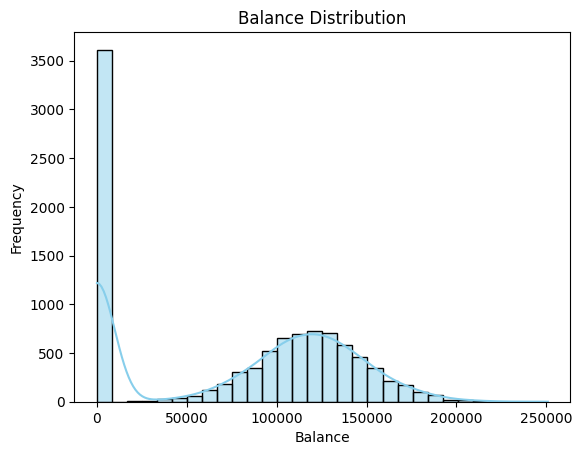

In [104]:
churn['Balance'].describe()
sns.histplot(churn['Balance'], bins=30, kde=True, color='skyblue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

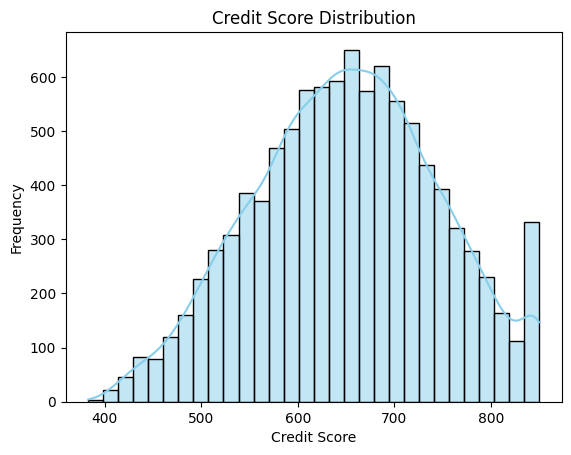

In [105]:
churn['CreditScore'].describe()
sns.histplot(churn['CreditScore'], bins=30, kde=True, color='skyblue')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency') 
plt.show()

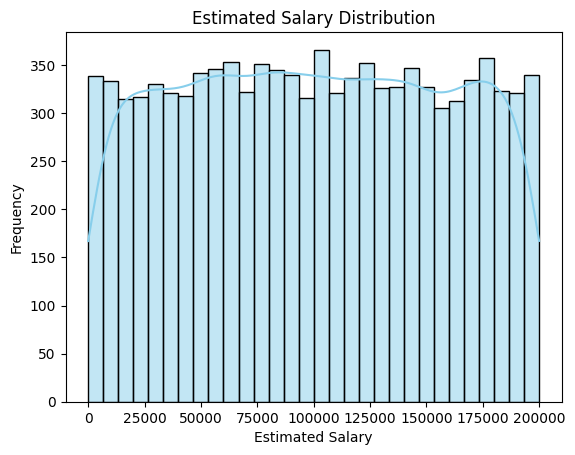

In [106]:
churn['EstimatedSalary'].describe()
sns.histplot(churn['EstimatedSalary'], bins=30, kde=True, color='skyblue')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

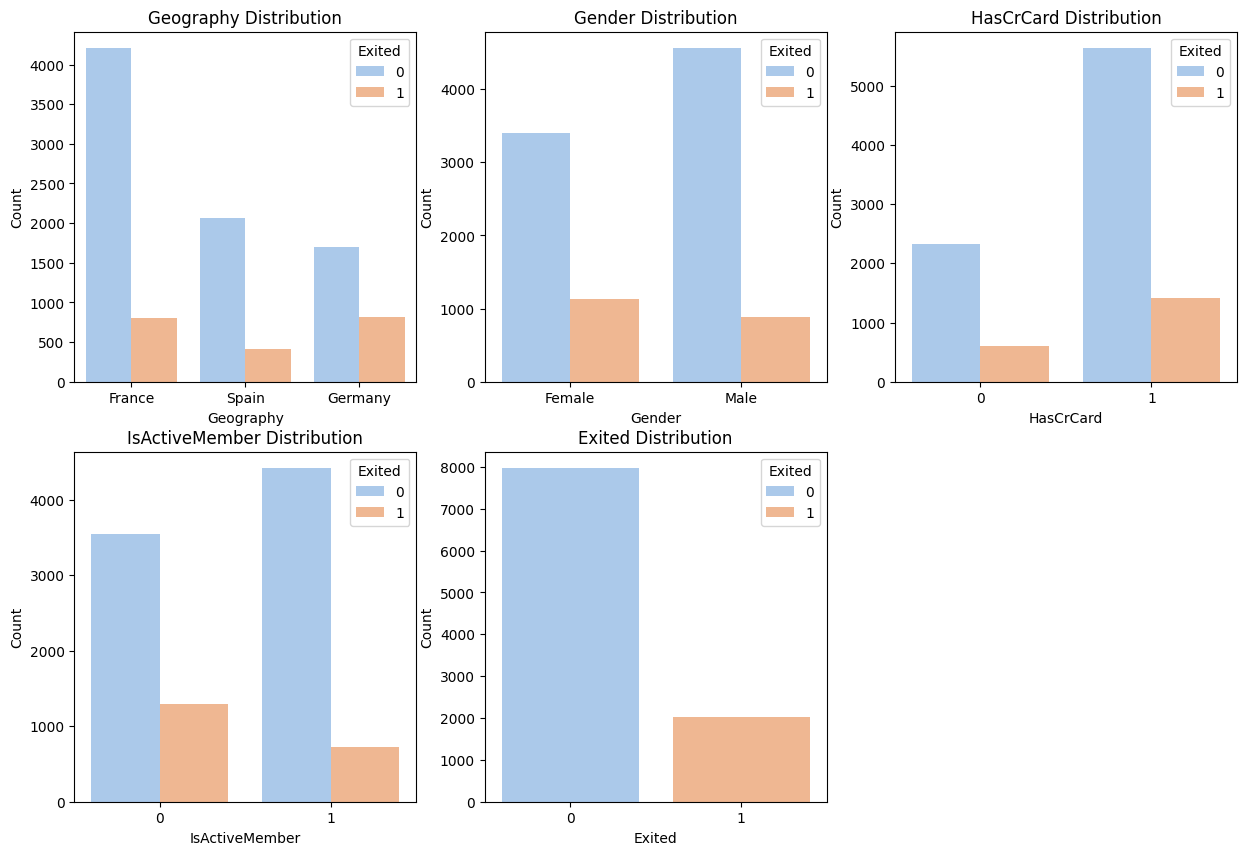

In [109]:
cats_col = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']

plt.figure(figsize=(15,10))
for i, col in enumerate(cats_col, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=churn, x=col, palette='pastel',hue='Exited')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

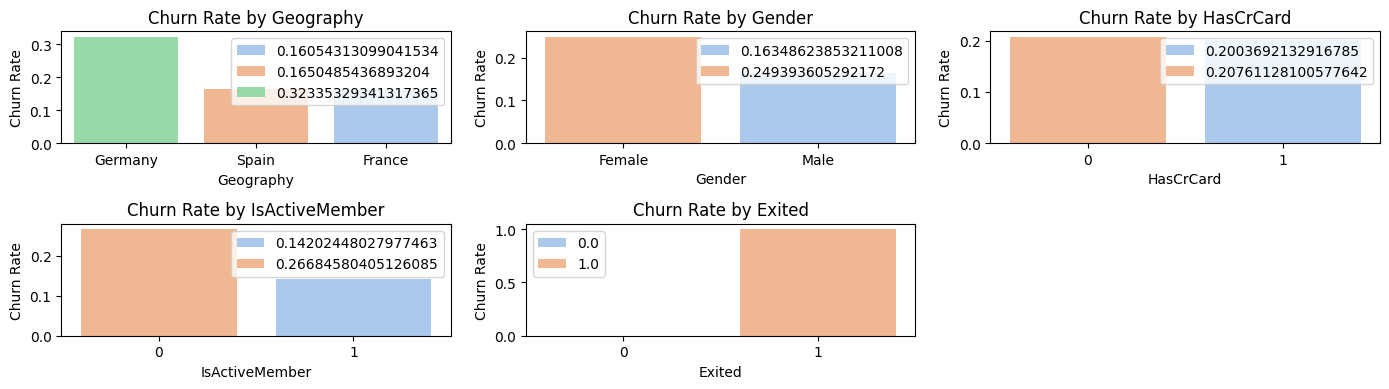

In [122]:
cat_cols = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    churn_rate = churn.groupby(col)['Exited'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='pastel',hue=churn_rate.values )
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


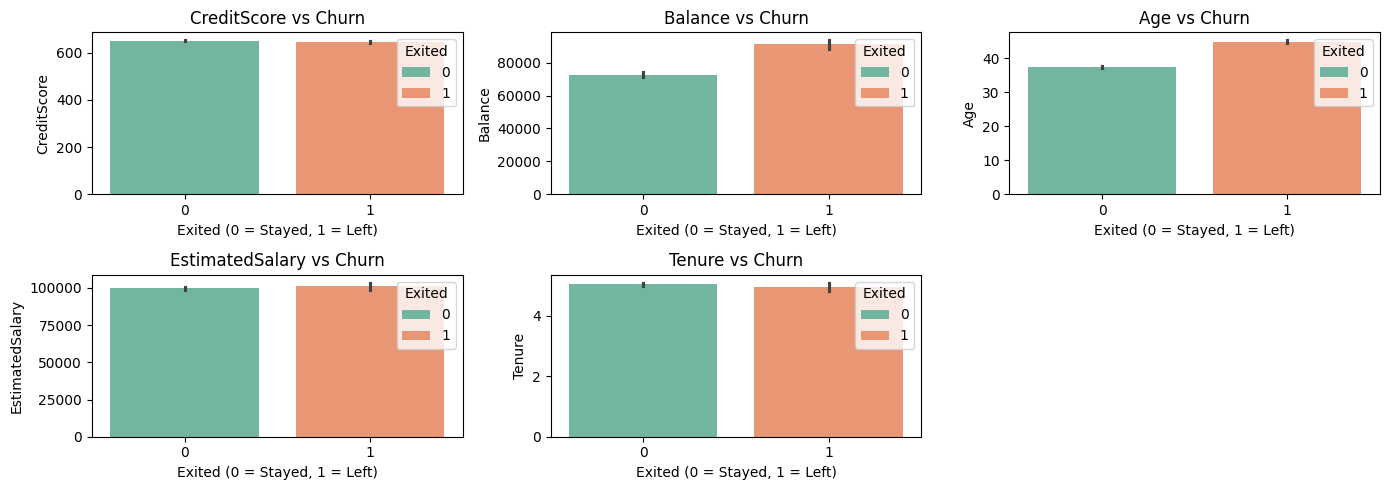

In [124]:
num_cols = ['CreditScore', 'Balance', 'Age','EstimatedSalary','Tenure']

plt.figure(figsize=(14, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Exited', y=col, data=churn, palette='Set2',hue='Exited')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Exited (0 = Stayed, 1 = Left)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


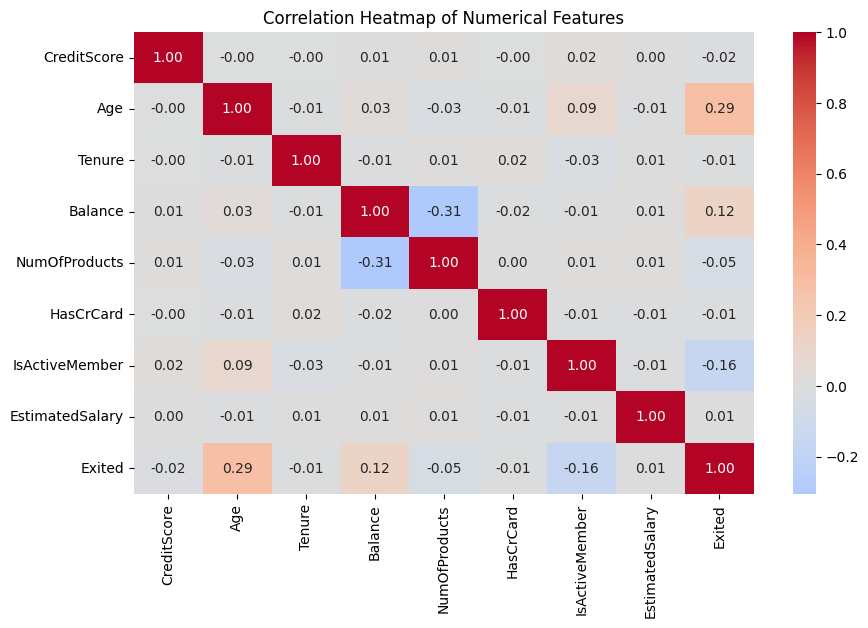

In [125]:
# Select only numeric columns
num_df = churn.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


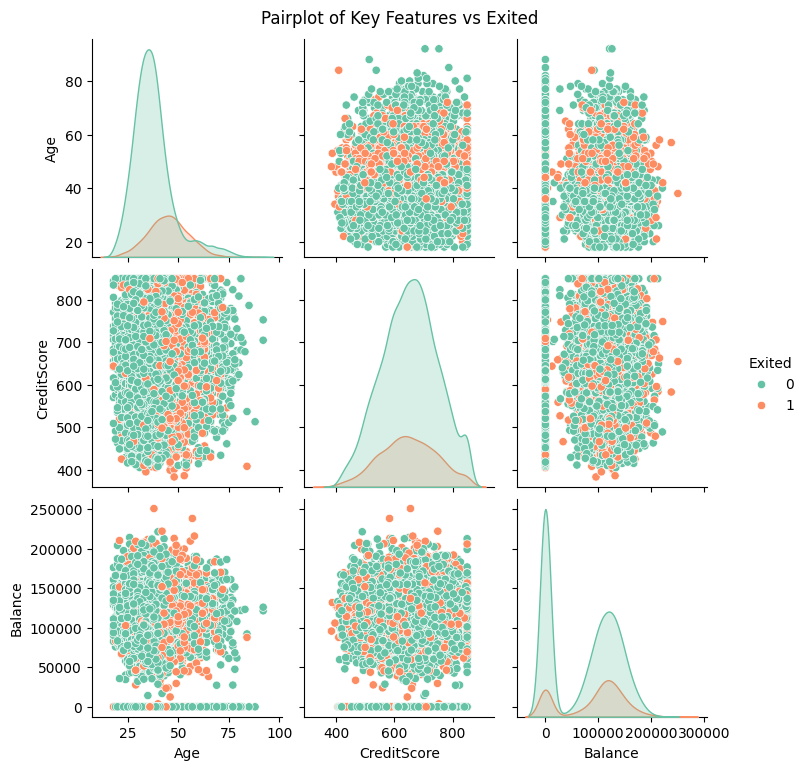

In [126]:
sns.pairplot(churn, vars=['Age', 'CreditScore', 'Balance'], hue='Exited', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Key Features vs Exited', y=1.02)
plt.show()
